# Customer Enrollment Predictions

### Import Libraries and Data

We would like to know if people who used a certain mobile app, because enrolled customers

In [215]:
# Import librarbies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [194]:
# Import dataset and explore it
df = pd.read_csv('appdata10.csv')

df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [195]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [197]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [198]:
# Some plots to visualize and explore data

df2 = df.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

In [199]:
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


### Data Visualization

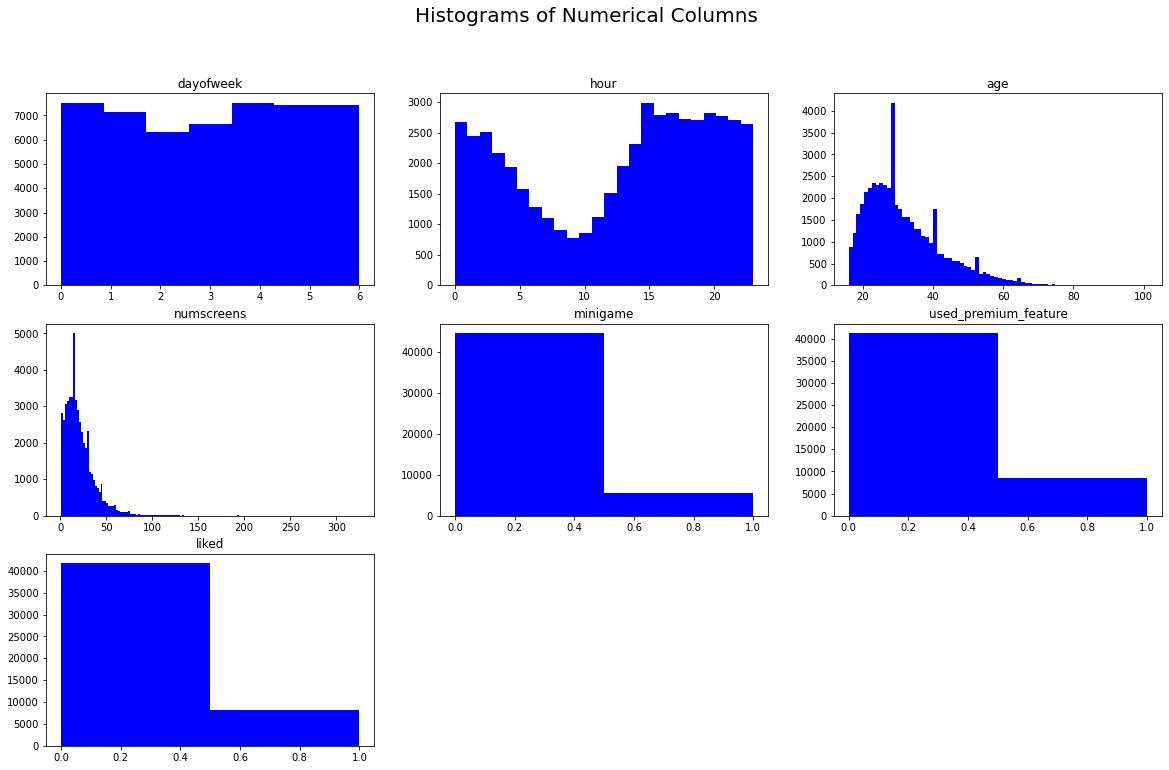

In [200]:
plt.figure(figsize=(20,12))
plt.suptitle('Histograms of Numerical Columns', fontsize =20)
for i in range(1,df2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df2.columns.values[i-1])
    
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1],bins = vals, color='blue')

<AxesSubplot:title={'center':' Correlations with Response'}>

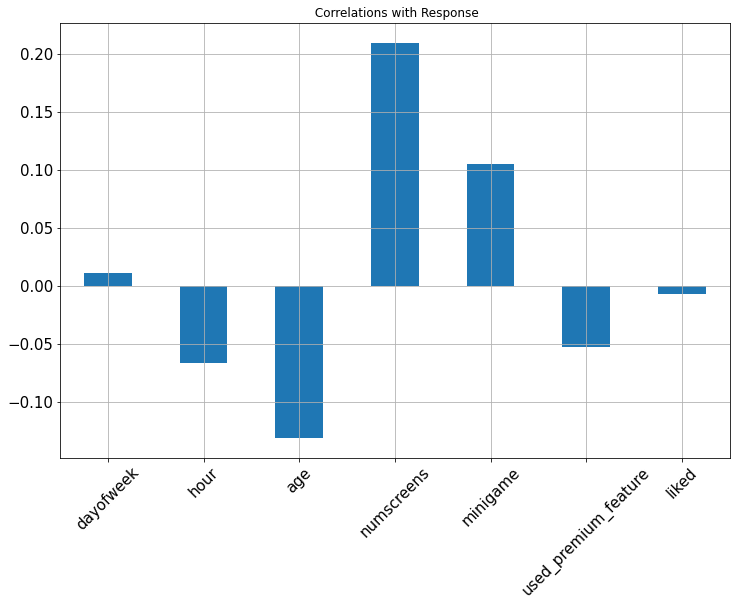

In [201]:
# Check correlations
df2.corrwith(df['enrolled']).plot.bar(figsize=(12,8),
                                    title = ' Correlations with Response',
                                    fontsize=15,rot = 45,
                                     grid = True)

Text(0.5, 1.0, 'Correlation Matrix')

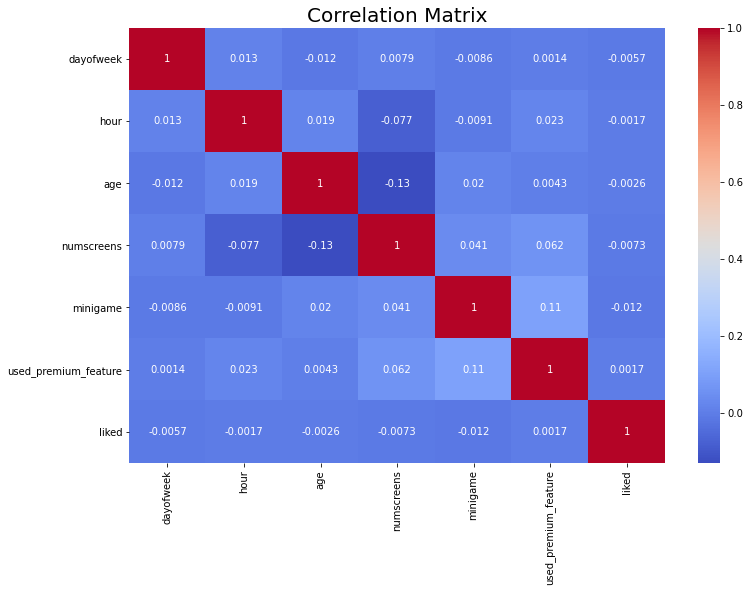

In [202]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm' )
plt.title('Correlation Matrix', size=20)

### Feature Engineering

In [203]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [204]:
# Change the type of dates to datetime
df['first_open'] = pd.to_datetime(df['first_open'])
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])

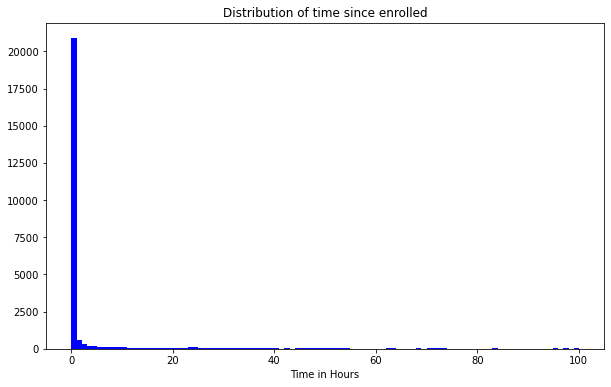

In [205]:
# Find time period between first opening of app and enrolling then plot it
df['difference'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

plt.figure(figsize=(10,6))
plt.hist(df['difference'].dropna(), color = 'blue',bins=100,range=[0,100])
plt.title('Distribution of time since enrolled')
plt.xlabel('Time in Hours')
plt.show()

Most people enroll within the first 10 hours of opnning app

In [206]:
# Set all responses happenning after 2 days to zero and drop unnecessary features
df.loc[df['difference']>48, 'enrolled']=0
df = df.drop(columns=['difference', 'enrolled_date', 'first_open'])

In [207]:
# Feature engineering of screens
# Load a list of top screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [208]:
df['screen_list'] = df.screen_list.astype(str) + ','

In [209]:
# Create a for loop in order to add a column for each screen in the list of top screens, 
#then remove it from original list.

for screen in top_screens:
    df[screen] = df.screen_list.str.contains(screen).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen + ',', '')

In [210]:
# Add a column for the remaining screens not in top screens then drop screen list
df['other'] = df.screen_list.str.count(',')
df = df.drop(columns=['screen_list'])

In [211]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [212]:
# Group related screens into one funnels in order to remove correlations between features
# List of related screens
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]

c_screens = ["CC1",
                "CC1Category",
                "CC3"]

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]

In [214]:
df.to_csv('new_appdata10.csv', index = False)

### Building the Model

In [223]:
# Data preprocessing
# Define the dependent variable
X = df.drop(columns=['enrolled'])
y = df['enrolled']

In [222]:
# Split data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
# Remove user ID from actual training and test sets, but keep it in a separate list

train_identifier = X_train['user']
X_train =  X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [227]:
# Scale features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

In [230]:
# Recover column names and indices
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [231]:
X_train = X_train2
X_test = X_test2

### Fit Model and Predict

In [234]:
# Import classifier and fit to training data

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l2')
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [235]:
# Make predictions
predicitons = classifier.predict(X_test)

### Evaluate Model

In [236]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(predicitons,y_test))
print('\n')
print(classification_report(predicitons,y_test))
print('\n')

[[3993 1093]
 [1112 3802]]


              precision    recall  f1-score   support

           0       0.78      0.79      0.78      5086
           1       0.78      0.77      0.78      4914

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000





<AxesSubplot:>

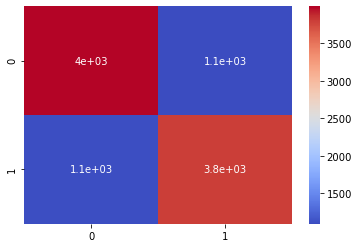

In [238]:
sns.heatmap(confusion_matrix(predicitons,y_test), cmap='coolwarm', annot=True)

### Cross Validation

In [240]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X= X_train, y=y_train,cv = 10)

In [245]:
print('Logisitic Accuracy(%): ' + str(np.mean(accuracies)*100))
print('\n')
print('STD(%): '+ str(np.std(accuracies)*100))

Logisitic Accuracy(%): 77.21499999999999


STD(%): 0.6808267033540905


### Formatting Final Results

In [254]:
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()

In [256]:
final_results['Predicted Results'] = predicitons

In [258]:
final_results[['user', 'enrolled','Predicted Results']].reset_index(drop=True)

,user,enrolled,Predicted Results
0,48024,1,0
1,266463,1,0
2,262169,1,0
3,213736,1,1
4,169082,1,1
...,...,...,...
9995,367119,0,1
9996,4433,0,0
9997,146917,1,1
9998,77281,1,1
